第7章　疎な解を持つカーネルマシン
==
サポートベクトルマシン（SVM; support vector machine）は実装の詳細が記述されていないので，関連ベクトルマシン（RVM; relational vector machine）を実装

RVMのモデル
--
* 線形モデルのパラメータの事前分布を疎な解が得られるように修正

与えられた入力ベクトル$\mathbf{x}$に対する実数値の目標変数$t$の条件付き確率分布

$$ 
p(t|\mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t|y(\mathbf{x}), \beta^{-1})
$$

ここで$\beta=\sigma^{-2}$はノイズの精度パラメータ（ノイズの分散の逆数），平均値は次の線形モデルで定義される．

$$ 
y(\mathbf{x})=\sum_{i=1}^{M}w_{i}\phi_{i}(\mathbf{x})=\mathbf{w}^{T}\mathbf{\phi}(\mathbf{x}) 
$$

基底関数として個々の訓練データを一方の引数としたカーネル関数を用いる．

$$ 
y(\mathbf{x})=\sum_{n=1}^{N}w_{n}k(\mathbf{x}, \mathbf{x}_{n})+b 
$$

パラメータの数は全部で$M=N+1$である．尤度関数は次式で与えられる．

$$ 
p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} p(t_{n}|\mathbf{x}_{n}, \mathbf{w}, \beta) 
$$

パラメータベクトル$\mathbf{w}$の事前分布として，平均0のガウス事前分布を用いる．__RVMにおいては個々の重みパラメータ$w_{i}$ごとに異なった超パラメータ$\alpha_{i}$を用いる．__つまり，重みに対する事前分布は次のようになる．

$$ 
p(\mathbf{w}|\mathbf{\alpha}) = \prod_{i=1}^{M} \mathcal{N} (w_{i}|0, \alpha_{i}^{-1}) 
$$

ここで，$\alpha_{i}$は対応する重みパラメータ$w_{i}$の精度を表し，$\mathbf{\alpha} = (\alpha_{1}, \dots ,\alpha_{M})^{T}$である．これらの超パラメータについてエビデンスを最大化すると，大部分の超パラメータは無限大になり，対応する重みパラメータの事後分布を零一点に集中する．すると，これらのパラメータに対応する基底関数（対応するデータ点との距離を表すカーネル関数）は予測において何の役割も果たさないため，取り除くことができ，疎なモデルが得られる．

重みベクトルに対する事後確率は再びガウス分布となり，次の形で表される．

$$ 
p(\mathbf{w}|\mathbf{t}, \mathbf{X}, \mathbf{\alpha}, \beta) = \mathcal{N}(\mathbf{w}|\mathbf{m}, \mathbf{\Sigma}) 
$$

ここで平均，および共分散は次の式で与えられる．

$$ 
\mathbf{m} = \beta \mathbf{\Sigma} \mathbf{\Phi}^{T} \mathbf{t} 
$$

$$ 
\mathbf{\Sigma} = \left( \mathbf{A} + \beta \mathbf{\Phi}^{T} \mathbf{\Phi} \right)^{-1} 
$$

ただし，$\mathbf{\Phi}$は，$i=1, \dots ,N$について要素$\Phi_{ni}=\phi_{i}(\mathbf{x}_{n})$を，そして$n=1, \dots ,N$について要素$\Phi_{nM}=1$を持つ$N \times M$の計画行列であり，$\mathbf{A}=\rm{diag}(\alpha_{i})$である．

$\mathbf{\alpha}$と$\beta$の値は__エビデンス近似（evidence approximation）__としても知られている第二種の最尤推定によって求められる．第二種の最尤推定を行うためには，まず重みパラメータについて積分を行う．

$$ 
p(\mathbf{t}|\mathbf{X}, \mathbf{\alpha}, \beta) = \int p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta)p(\mathbf{w}|\mathbf{\alpha}) d\mathbf{w} 
$$

この式は2つのガウス分布のたたみ込み積分となっているため，解析的に積分を実行することができ，以下のように対数尤度が求まる．

$$ 
\begin{split} 
\ln p(\mathbf{t}|\mathbf{X}, \mathbf{\alpha}, \beta) 
&= \ln \mathcal{N} (\mathbf{t}|\mathbf{0}, \mathbf{C}) \\ 
&= -\frac{1}{2}\left\{ N \ln (2 \pi) + \ln |\mathbf{C}| + \mathbf{t}^{T}\mathbf{C}^{-1}\mathbf{t}\right\}
\end{split}
$$

ここで$\mathbf{t} = (t_{1}, \dots ,t_{N})^{T}$である．また$N \times N$行列$\mathbf{C}$を次のように定義した．

$$ 
\mathbf{C} = \beta^{-1}\mathbf{I} + \mathbf{\Phi} \mathbf{A}^{-1} \mathbf{\Phi}^{T} 
$$

得られた対数尤度の異聞を0とおくことで，次のように超パラメータの更新式を得る．

$$ 
\begin{split}
\alpha_{i}^{new} &= \frac{\gamma_{i}}{m_{i}^{2}} \\
(\beta^{new})^{-1} &= \frac{\|\mathbf{t} - \mathbf{\Phi m}\|^{2}}{N - \Sigma_{i}\gamma_{i}} 
\end{split}
$$

ここで，$\gamma_{i}$は対応する重みパラメータ$w_{i}$が，データにどれだけよく特定されたかを表す量で，次の式で定義される．

$$ 
\gamma_{i} = 1 - \alpha_{i} \Sigma_{ii}
$$

超パラメータの学習は，以上の結果を用いて，次のように進める．まず，適当に選んだ$\mathbf{\alpha}$と$\beta$の初期値から事後確率の平均$\mathbf{m}$と共分散$\mathbf{\Sigma}$を推定する．次に得られた値から超パラメータを推定する．この過程を適当な収束条件が満たされるまで交互に繰り返す．

In [4]:
from matplotlib.font_manager import FontProperties

# matplotlibで日本語フォント
fp = FontProperties(fname=r'/System/Library/Fonts/ヒラギノ角ゴ ProN W3')

(-1.5, 1.5)

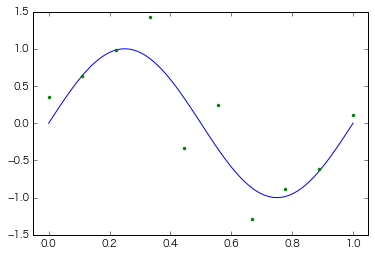

In [5]:
# 正弦波の人工データ
X_train = np.linspace(0, 1, num=10)
y_train = np.sin(X_train * 2 * np.pi) + np.random.randn(len(X_train)) * 0.3
X_test = np.linspace(0, 1, num=100)
y_test = np.sin(X_test * 2 * np.pi)

plt.plot(X_test, y_test)
plt.plot(X_train, y_train, '.')
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)

In [33]:
class RVM(object):
    """ 関係ベクトルマシン """
    def __init__(self, X, y, sig=0.2):
        # ノイズの精度パラメータ
        self.beta = None 
        # 重みの事前情報の精度ベクトル（M次元）
        self.alpha = None
        # 重みの事後分布の平均
        self.m = None 
        # 重みの事後分布の共分散
        self.s = None 
        # 0除算しないためのしきい値
        self.eps = 1e-8
        # ガウスカーネルの標準偏差
        self.sig = sig 
        # 訓練データの入力
        self.X = X 
        # 訓練データの出力
        self.y = y 
        # データ数
        self.N = len(y)
        # 基底関数の数
        self.M = self.N + 1
        # デザイン行列
        self.phi = self.design_matrix()
        # 尤度の共分散
        self.C = None
        
    def kernel(self, x):
        """ ガウスカーネル（定数項を含む） """
        phi = np.zeros(self.M)
        phi[:self.N] = np.exp(-0.5 * ((x - self.X) / self.sig) ** 2)
        phi[self.N] = 1.
        return phi
    
    def design_matrix(self):
        """ デザイン行列を作成 """
        phi = np.zeros((self.N, self.M))
        for row, x in enumerate(self.X):
            phi[row, :self.N] = np.exp(-0.5 * ((x - self.X) / self.sig) ** 2)
            phi[row, self.N] = 1.
        return phi

    def fit(self, niter=100):
        """ α，βを最適化 """               
        self.alpha = np.ones(self.M)
        self.beta = 0.1
        for _ in xrange(niter):
            self.s = np.linalg.inv(np.diag(self.alpha) + self.beta * np.dot(self.phi.T, self.phi))
            self.m = self.beta * np.dot(self.s, np.dot(self.phi.T, self.y))
            rsum = 0
            for i in xrange(self.M):
                r = 1 - self.alpha[i] * self.s[i, i]
                m2 = self.m[i] ** 2
                if m2 > self.eps:
                    self.alpha[i] = r / m2
                rsum += r
            err = self.y - np.dot(self.phi, self.m)
            err2 = np.dot(err.T, err).flatten()
            if err2 > self.eps:
                self.beta = (self.N - rsum) / err2
    
    def pred(self, x):
        """ 予測の平均と分散 """        
        def fun(x):
            phi_x = self.kernel(x)
            m_x = np.dot(self.m.T, phi_x)
            var = 1. / self.beta + np.dot(phi_x.T, np.dot(self.s, phi_x)) 
            return m_x, var[0]
  
        isiterable = lambda obj: isinstance(obj, basestring) or getattr(obj, '__iter__', False)
        if isiterable(x):
            res = map(fun, x)
            return np.array(res)
        else:
            return fun(x)

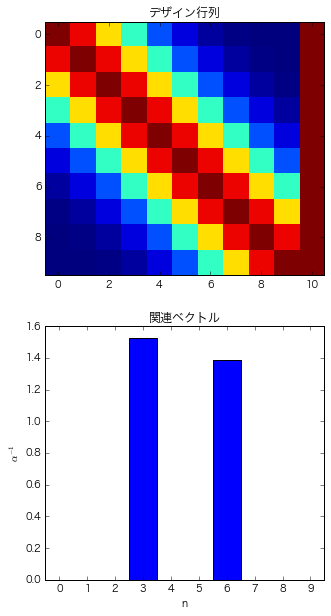

In [34]:
rvm = RVM(X_train, y_train, sig=0.25)
rvm.fit()

fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax = ax.flatten()
ax[0].imshow(rvm.phi, interpolation='Nearest')
ax[0].set_title(u'デザイン行列')

ax[1].bar(np.arange(rvm.M) - 0.5, 1. / rvm.alpha, 1.)
ax[1].set_xticks(np.arange(rvm.M))
ax[1].set_xlim(-0.5, 9.5)
ax[1].set_title(u'関連ベクトル')
ax[1].set_ylabel(r'$\alpha^{-1}$')
ax[1].set_xlabel('n')

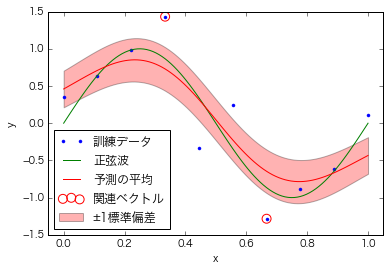

In [35]:
res = rvm.pred(X_test)
y_pred = res[:, 0]
y_sig = res[:, 1]

rv = np.where(rvm.alpha < 1.)[0]
plt.plot(X_train, y_train, '.', label=u'訓練データ')
plt.scatter(X_train[rv], y_train[rv], s=80, facecolors='none', edgecolors='red', label=u'関連ベクトル')
plt.plot(X_test, y_test, label=u'正弦波')
plt.plot(X_test, y_pred, label=u'予測の平均')
plt.fill_between(X_test, y_pred + y_sig, y_pred - y_sig, facecolor='red', alpha=0.3, label=u'±1標準偏差')
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')